In [1]:
import os, sys
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
import matplotlib
import numpy as np

In [0]:
def reset_graph(seed = 42):
  tf.reset_default_graph()
  tf.set_random_seed(seed)
  np.random.seed(seed)

In [0]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
matplotlib.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

In [0]:
def plot_image(image, shape = [28, 28]):
  plt.imshow(image.reshape(shape), cmap = 'grey', interpolation = 'nearest')
  plt.axis("off")
def plot_multiple_images(images, n_rows, n_cols, pad = 2):
  images = images - images.min()
  w, h = images.shape[1:]
  image = np.zeros(((w + pad)*n_rows + pad, (h + pad)*n_cols + pad))
  for y in range(n_rows):
    for x in range(n_cols):
      image[(y*(h + pad) + pad): ((y+1)*(h + pad)), (x*(w + pad) + pad): ((x+1)*(h+pad))] = images[y*n_cols + x]
  plt.imshow(image, cmap = 'grey', interpolation = 'nearest')
  plt.axis("off")



## 오토인코더로 PCA 구현하기

In [0]:
import numpy.random as rnd
rnd.seed(4)
m = 200
w1, w2 = 0.1, 0.3
noise = 0.1

angles = rnd.rand(m)*3*np.pi / 2 - 0.5
data = np.empty((m,3))
data[:,0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m)/2
data[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * rnd.randn(m)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100])
Y_train = scaler.transform(data[100:])

In [0]:
reset_graph()
n_inputs = 3
n_hidden = 2
n_outputs = n_inputs

X = tf.placeholder(tf.float32, shape = [None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

learning_rate = 0.01
iteration_num = 1000
pca = hidden

loss_func = tf.reduce_mean(tf.square(X - outputs))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_func)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  for step in range(iteration_num):
    optimizer.run(feed_dict = {X: X_train})
  pca_val = pca.eval(feed_dict = {X: X_train})


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


pca_val.shape : (100, 2)


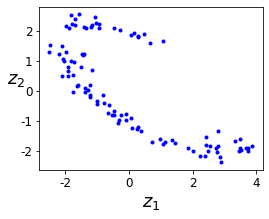

In [16]:

fig = plt.figure(figsize=(4,3))
plt.plot(pca_val[:,0], pca_val[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
print('pca_val.shape :', pca_val.shape)
plt.show()